# Processed Data Creation and EDA
## Removing Users with > 200 Interactions

This notebook:
1. Creates an dataset by removing users with more than 200 interactions
2. Performs comprehensive analytics on the data
3. Compares original vs processed datasets

## 1. Import Required Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 2. Load Original Data

In [5]:
def load_txt_data(filepath):
    """Load user-item interaction data from TXT file"""
    user_items = []
    with open(filepath, 'r') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            items = line.split()
            if len(items) < 2:
                continue
            user_id = int(items[0])
            item_list = [int(x) for x in items[1:]]
            user_items.append((user_id, item_list))
    return user_items

# Load original data
print("Loading original data from train-2.txt...")
original_data = load_txt_data(r'raw_data\train-2.txt')
print(f" Loaded {len(original_data):,} users")

# Display stats
orig_interactions = [len(items) for _, items in original_data]
print(f"\nOriginal Data Statistics:")
print(f"  Min interactions: {min(orig_interactions)}")
print(f"  Max interactions: {max(orig_interactions):,}")
print(f"  Mean interactions: {np.mean(orig_interactions):.2f}")
print(f"  Median interactions: {np.median(orig_interactions):.2f}")

Loading original data from train-2.txt...
 Loaded 52,643 users

Original Data Statistics:
  Min interactions: 16
  Max interactions: 10,682
  Mean interactions: 45.22
  Median interactions: 26.00


## 3. Create Processed Data (Remove Users with > 200 Interactions)

In [8]:
# Set threshold
MAX_INTERACTIONS = 200

print("CREATING PROCESSED DATA")
print("="*70)

# Filter users
interim_data = [(uid, items) for uid, items in original_data if len(items) <= MAX_INTERACTIONS]

removed_count = len(original_data) - len(interim_data)
removed_percentage = (removed_count / len(original_data)) * 100

print(f"Original users: {len(original_data):,}")
print(f"Removed users: {removed_count:,} ({removed_percentage:.2f}%)")
print(f"Remaining users: {len(interim_data):,} ({(1-removed_percentage/100)*100:.2f}%)")

# Save interim data
output_file = 'train-2-interim.txt'
print(f"\nSaving interim data to {output_file}")
with open(output_file, 'w') as f:
    for uid, items in interim_data:
        f.write(f"{uid} " + " ".join(map(str, items)) + "\n")

CREATING PROCESSED DATA
Original users: 52,643
Removed users: 1,223 (2.32%)
Remaining users: 51,420 (97.68%)

Saving interim data to train-2-interim.txt...
 Data saved successfully!


# EDA

## 4. Processed Data - User Interaction Statistics

In [11]:
# Calculate interaction counts
interim_interactions = [len(items) for _, items in interim_data]

print("PROCESSED DATA - USER INTERACTION STATISTICS")
print("="*70)
print(f"\nTotal Users: {len(interim_data):,}")
print(f"\nInteraction Range:")
print(f"  Minimum: {min(interim_interactions)}")
print(f"  Maximum: {max(interim_interactions)}")
print(f"  Mean: {np.mean(interim_interactions):.2f}")
print(f"  Median: {np.median(interim_interactions):.2f}")
print(f"  Std Dev: {np.std(interim_interactions):.2f}")

print(f"\nPercentile Analysis:")
for p in [10, 25, 50, 75, 90, 95, 99]:
    value = np.percentile(interim_interactions, p)
    print(f"  {p}th percentile: {value:.0f} interactions")

print(f"\nDistribution by Interaction Count:")
buckets = [(1, 10), (11, 50), (51, 100), (101, 200)]
for min_val, max_val in buckets:
    count = sum(1 for c in interim_interactions if min_val <= c <= max_val)
    percentage = (count / len(interim_interactions)) * 100
    label = f"{min_val}-{max_val}"
    print(f"  {label:12s}: {count:6,} users ({percentage:5.2f}%)")

PROCESSED DATA - USER INTERACTION STATISTICS

Total Users: 51,420

Interaction Range:
  Minimum: 16
  Maximum: 200
  Mean: 38.14
  Median: 26.00
  Std Dev: 31.12

Percentile Analysis:
  10th percentile: 16 interactions
  25th percentile: 19 interactions
  50th percentile: 26 interactions
  75th percentile: 44 interactions
  90th percentile: 77 interactions
  95th percentile: 108 interactions
  99th percentile: 168 interactions

Distribution by Interaction Count:
  1-10        :      0 users ( 0.00%)
  11-50       : 41,085 users (79.90%)
  51-100      :  7,323 users (14.24%)
  101-200     :  3,012 users ( 5.86%)


## 5. Processed Data - Item Statistics

In [15]:
# Item statistics
interim_all_items = set()
interim_item_frequency = {}

for _, items in interim_data:
    for item in items:
        interim_all_items.add(item)
        interim_item_frequency[item] = interim_item_frequency.get(item, 0) + 1

interim_item_freqs = list(interim_item_frequency.values())

print("PROCESSED DATA - ITEM STATISTICS")
print("="*70)
print(f"\nTotal Unique Items: {len(interim_all_items):,}")
print(f"Item ID Range: {min(interim_all_items)} to {max(interim_all_items):,}")

print(f"\nItem Popularity Statistics:")
print(f"  Mean interactions per item: {np.mean(interim_item_freqs):.2f}")
print(f"  Median interactions per item: {np.median(interim_item_freqs):.2f}")
print(f"  Min interactions: {min(interim_item_freqs)}")
print(f"  Max interactions: {max(interim_item_freqs):,}")

print(f"\nTop 10 Most Popular Items:")
sorted_items = sorted(interim_item_frequency.items(), key=lambda x: x[1], reverse=True)[:10]
for rank, (item_id, freq) in enumerate(sorted_items, 1):
    print(f"{rank:2d}. Item {item_id:6d}: {freq:6,} interactions")

print(f"\nItem Popularity Distribution after removing User's with more than 200 interactions::")
item_buckets = [(1, 5), (6, 10), (11, 50), (51, 100), (101, 180),(181, 500), (501, 1000), (1001, float('inf'))]
for min_val, max_val in item_buckets:
    count = sum(1 for f in interim_item_freqs if min_val <= f <= max_val)
    percentage = (count / len(interim_item_freqs)) * 100
    label = f"{min_val}-{max_val}" if max_val != float('inf') else f"{min_val}+"
    print(f"{label:12s}: {count:6,} items ({percentage:5.2f}%)")

PROCESSED DATA - ITEM STATISTICS

Total Unique Items: 91,522
Item ID Range: 6 to 91,604

Item Popularity Statistics:
  Mean interactions per item: 21.43
  Median interactions per item: 12.00
  Min interactions: 1
  Max interactions: 1,556

Top 10 Most Popular Items:
 1. Item    896:  1,556 interactions
 2. Item  43756:  1,310 interactions
 3. Item   7897:  1,156 interactions
 4. Item  36454:  1,067 interactions
 5. Item  36477:  1,054 interactions
 6. Item  49144:    936 interactions
 7. Item    900:    922 interactions
 8. Item  48177:    877 interactions
 9. Item   5790:    857 interactions
10. Item   1258:    770 interactions

Item Popularity Distribution after removing User's with more than 200 interactions::
1-5         :  8,916 items ( 9.74%)
6-10        : 28,896 items (31.57%)
11-50       : 46,736 items (51.07%)
51-100      :  4,977 items ( 5.44%)
101-180     :  1,373 items ( 1.50%)
181-500     :    567 items ( 0.62%)
501-1000    :     52 items ( 0.06%)
1001+       :      5 item

## 6. Interim Data - Data Sparsity Analysis

In [17]:
interim_total_possible = len(interim_data) * len(interim_all_items)
interim_total_actual = sum(interim_interactions)
interim_sparsity = (1 - interim_total_actual / interim_total_possible) * 100

print("PROCESSED DATA - DATA SPARSITY ANALYSIS")
print("="*70)
print(f"\nTotal Users: {len(interim_data):,}")
print(f"Total Items: {len(interim_all_items):,}")
print(f"Total Possible Interactions: {interim_total_possible:,}")
print(f"Total Actual Interactions: {interim_total_actual:,}")
print(f"\nData Sparsity: {interim_sparsity:.4f}%")
print(f"Data Density: {100-interim_sparsity:.4f}%")

PROCESSED DATA - DATA SPARSITY ANALYSIS

Total Users: 51,420
Total Items: 91,522
Total Possible Interactions: 4,706,061,240
Total Actual Interactions: 1,961,174

Data Sparsity: 99.9583%
Data Density: 0.0417%


## 7. Visualizations - Processed Data

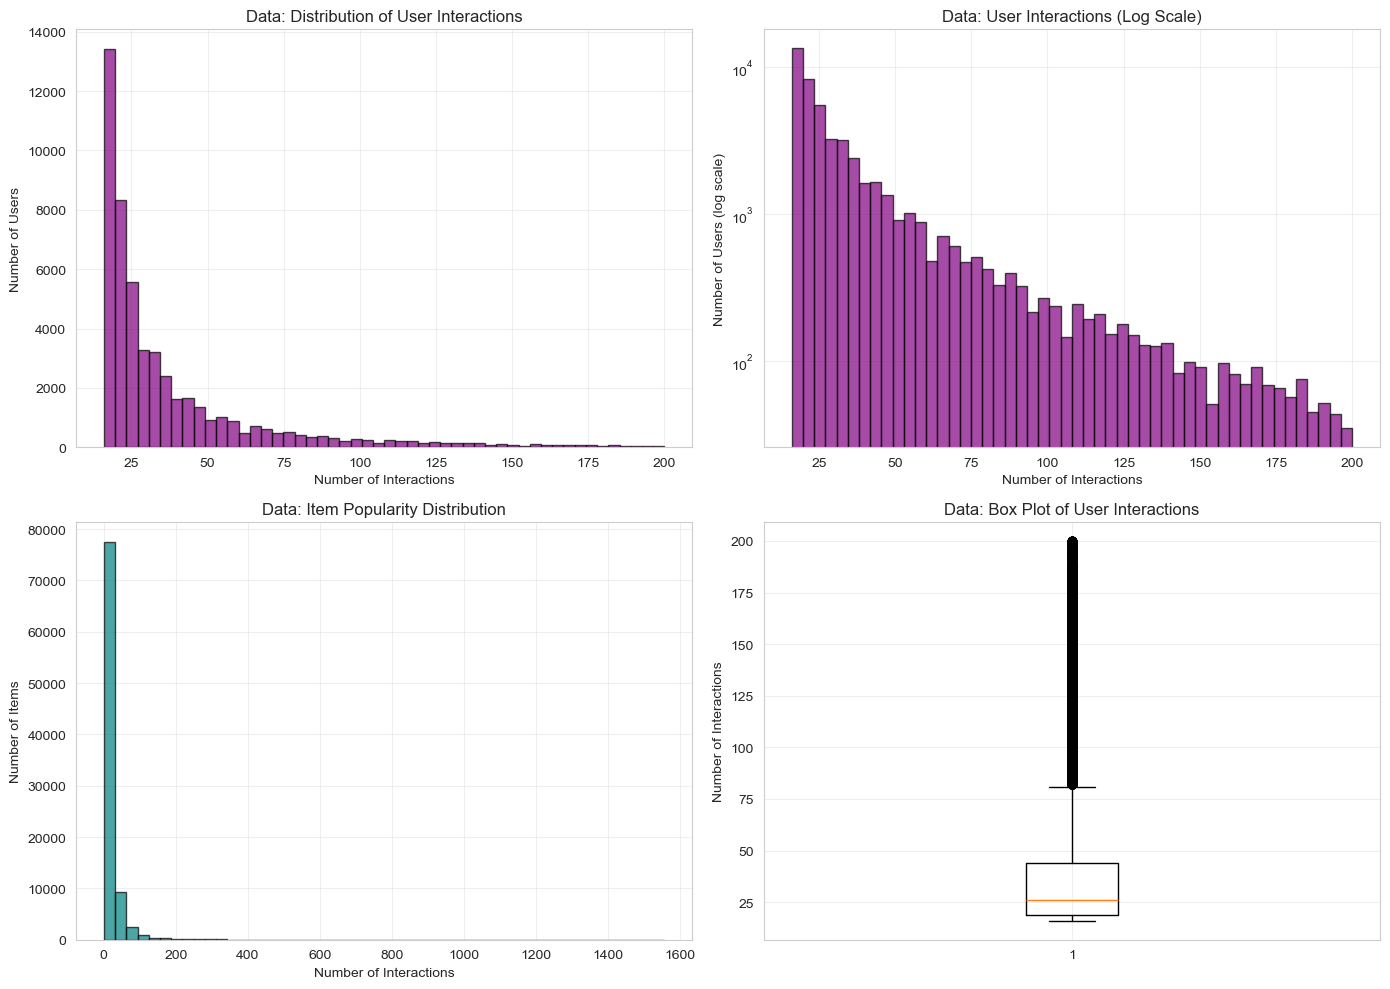

In [21]:
# Create comprehensive visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Histogram of user interactions
axes[0, 0].hist(interim_interactions, bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[0, 0].set_xlabel('Number of Interactions')
axes[0, 0].set_ylabel('Number of Users')
axes[0, 0].set_title('Data: Distribution of User Interactions')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Log-scale histogram
axes[0, 1].hist(interim_interactions, bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[0, 1].set_xlabel('Number of Interactions')
axes[0, 1].set_ylabel('Number of Users (log scale)')
axes[0, 1].set_title('Data: User Interactions (Log Scale)')
axes[0, 1].set_yscale('log')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Item popularity distribution
axes[1, 0].hist(interim_item_freqs, bins=50, edgecolor='black', alpha=0.7, color='teal')
axes[1, 0].set_xlabel('Number of Interactions')
axes[1, 0].set_ylabel('Number of Items')
axes[1, 0].set_title('Data: Item Popularity Distribution')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Box plot
axes[1, 1].boxplot(interim_interactions, vert=True)
axes[1, 1].set_ylabel('Number of Interactions')
axes[1, 1].set_title('Data: Box Plot of User Interactions')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

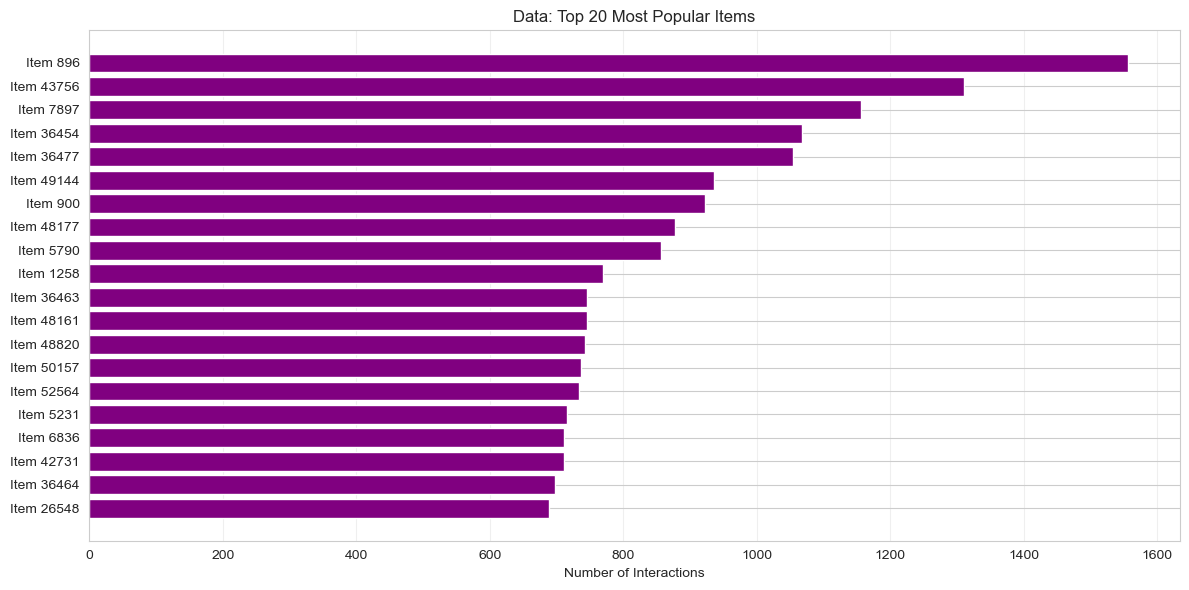

In [22]:
# Top items visualization
fig, ax = plt.subplots(figsize=(12, 6))
top_items = sorted(interim_item_frequency.items(), key=lambda x: x[1], reverse=True)[:20]
items = [f"Item {x[0]}" for x in top_items]
freqs = [x[1] for x in top_items]

ax.barh(items, freqs, color='purple')
ax.set_xlabel('Number of Interactions')
ax.set_title('Data: Top 20 Most Popular Items')
ax.grid(True, alpha=0.3, axis='x')
ax.invert_yaxis()

plt.tight_layout()
plt.show()

## 8. Comparison: Original vs Processed Data

In [24]:
print("COMPARISON: ORIGINAL vs PROCESSED DATA")
print("="*70)

# Calculate original stats
orig_all_items = set()
for _, items in original_data:
    orig_all_items.update(items)

orig_total = sum(orig_interactions)
orig_sparsity = (1 - orig_total / (len(original_data) * len(orig_all_items))) * 100

# Print comparison table
print(f"\n{'Metric':<35} {'Original':<20} {'Processed':<20} {'Change'}")
print("-" * 95)

print(f"{'Total Users':<35} {len(original_data):<20,} {len(interim_data):<20,} {len(interim_data)-len(original_data):,}")
print(f"{'Total Items':<35} {len(orig_all_items):<20,} {len(interim_all_items):<20,} {len(interim_all_items)-len(orig_all_items):,}")
print(f"{'Total Interactions':<35} {orig_total:<20,} {interim_total_actual:<20,} {interim_total_actual-orig_total:,}")
print(f"{'Min Interactions/User':<35} {min(orig_interactions):<20} {min(interim_interactions):<20} -")
print(f"{'Max Interactions/User':<35} {max(orig_interactions):<20,} {max(interim_interactions):<20,} -")
print(f"{'Mean Interactions/User':<35} {np.mean(orig_interactions):<20.2f} {np.mean(interim_interactions):<20.2f} {np.mean(interim_interactions)-np.mean(orig_interactions):.2f}")
print(f"{'Median Interactions/User':<35} {np.median(orig_interactions):<20.2f} {np.median(interim_interactions):<20.2f} {np.median(interim_interactions)-np.median(orig_interactions):.2f}")
print(f"{'Std Dev Interactions/User':<35} {np.std(orig_interactions):<20.2f} {np.std(interim_interactions):<20.2f} {np.std(interim_interactions)-np.std(orig_interactions):.2f}")
print(f"{'Data Sparsity (%)':<35} {orig_sparsity:<20.4f} {interim_sparsity:<20.4f} {interim_sparsity-orig_sparsity:.4f}")

COMPARISON: ORIGINAL vs PROCESSED DATA

Metric                              Original             Processed            Change
-----------------------------------------------------------------------------------------------
Total Users                         52,643               51,420               -1,223
Total Items                         91,599               91,522               -77
Total Interactions                  2,380,730            1,961,174            -419,556
Min Interactions/User               16                   16                   -
Max Interactions/User               10,682               200                  -
Mean Interactions/User              45.22                38.14                -7.08
Median Interactions/User            26.00                26.00                0.00
Std Dev Interactions/User           77.96                31.12                -46.83
Data Sparsity (%)                   99.9506              99.9583              0.0077


## 9. Summary

In [28]:
print("\n Summary:")
print(f" Removed {removed_count:,} users ({removed_percentage:.2f}%) with > 200 interactions")
print(f" Retained {len(interim_data):,} users ({(1-removed_percentage/100)*100:.2f}%)")
print(f" Removed {len(orig_all_items) - len(interim_all_items)} items")
print(f" Removed {orig_total - interim_total_actual:,} interactions")

print("\n Key Improvements:")
print(f" Max interactions reduced from {max(orig_interactions):,} to {max(interim_interactions)}")
print(f" Mean interactions: {np.mean(orig_interactions):.2f} -> {np.mean(interim_interactions):.2f}")
print(f" Std deviation: {np.std(orig_interactions):.2f} -> {np.std(interim_interactions):.2f} (more balanced!)")


 Summary:
 Removed 1,223 users (2.32%) with > 200 interactions
 Retained 51,420 users (97.68%)
 Removed 77 items
 Removed 419,556 interactions

 Key Improvements:
 Max interactions reduced from 10,682 to 200
 Mean interactions: 45.22 → 38.14
 Std deviation: 77.96 → 31.12 (more balanced!)
